#             Crack detection using otsu thresholding and open cv

In [1]:
import cv2
import matplotlib as mpl
import matplotlib.pyplot as plt


img = cv2.imread(r'C:\Users\yugan\OneDrive\Desktop\Dataset\pos\00004.jpg')  
cv2.imshow('image', img) 



In [2]:
h, w, c = img.shape
print('width:  ', w)
print('height: ', h)
print('channel:', c)
    

width:   227
height:  227
channel: 3


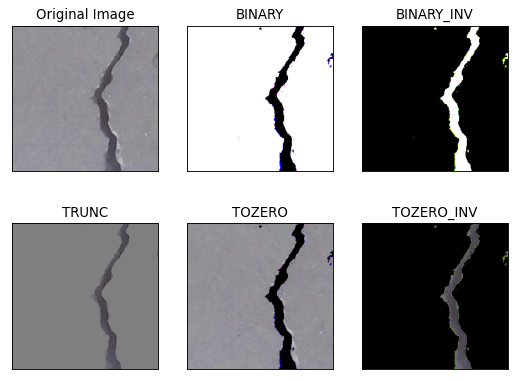

In [3]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
median = cv2.medianBlur(img,5)

ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]


for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

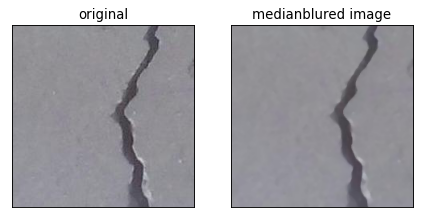

In [4]:
import cv2
from PIL import Image 
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
median = cv2.medianBlur(img,5)
titles=['original','medianblured image']
images=[img,median]

for i in range(2):
    plt.subplot(1,3,i+1),plt.imshow(images[i],'gray'),cv2.resizeWindow('', 55560,55560)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])



In [5]:
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


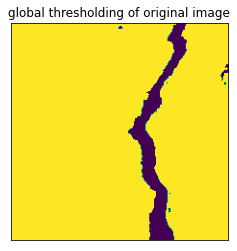

In [6]:
## ostu methods 
## I'm gonna plot 3 outputs (1.Using global thresholding 2.gloval thresholding plus ostu 3.gloval thresholding plus ostu +  noise removal from image
ret,output1=cv2.threshold(img_grey,127,255,cv2.THRESH_BINARY)

plt.imshow(output1)
plt.title('global thresholding of original image')
plt.xticks([])
plt.yticks([])

plt.show()

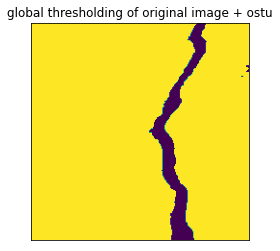

In [7]:
ret,output2=cv2.threshold(img_grey,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(output2)
plt.title('global thresholding of original image + ostu')
plt.xticks([])
plt.yticks([])

plt.show()

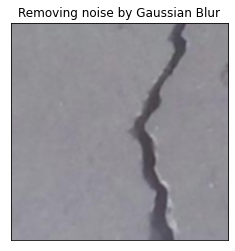

In [8]:
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,output3 = cv2.threshold(img_grey,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(blur)
plt.title('Removing noise by Gaussian Blur')
plt.xticks([])
plt.yticks([])
plt.show()


In [9]:
blur_grey = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)


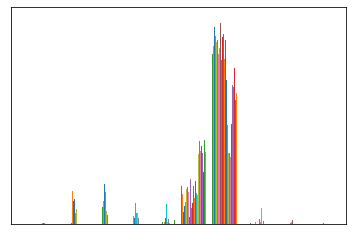

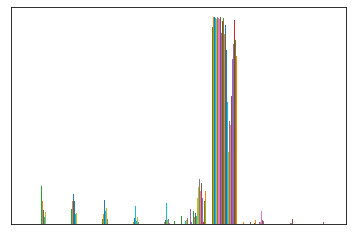

In [10]:
io=[img_grey,blur_grey]
for i in range(2):
    plt.hist(io[i])
    plt.xticks([])
    plt.yticks([])
    plt.show()


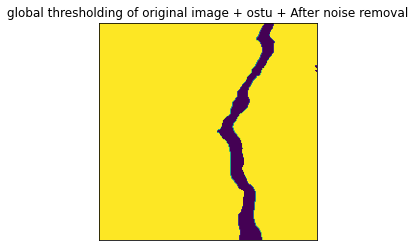

In [11]:
ret,output3=cv2.threshold(blur_grey,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(output3)
plt.title('global thresholding of original image + ostu + After noise removal')
plt.xticks([])
plt.yticks([])

plt.show()

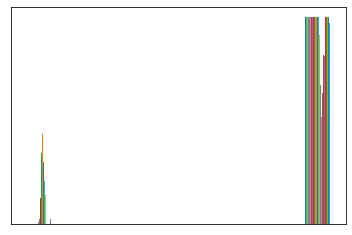

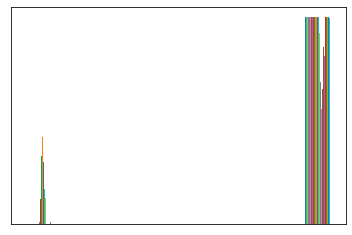

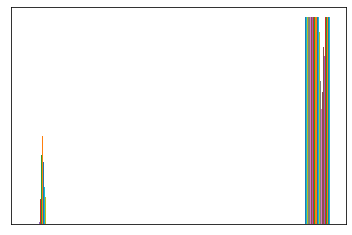

In [12]:
images=[output1,output2,output3]

for i in range(3):
    plt.hist(images[i])
    plt.xticks([])
    plt.yticks([])
    plt.show()

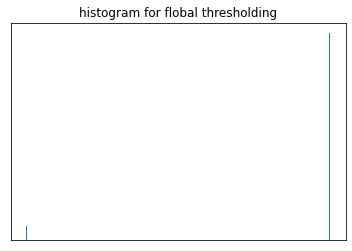

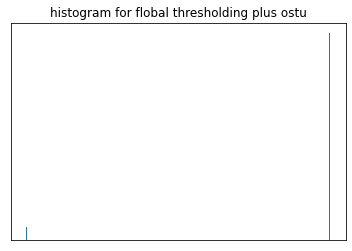

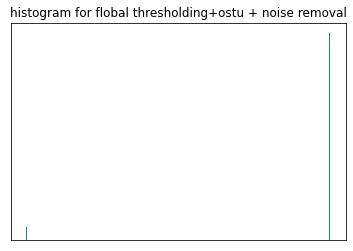

In [13]:
### After using ravel function
## what ravel function do is returns contiguous flattened array(1D array with all the input-array elements and with the same type as it)
## Marker size can be changed for histogram
images=[output1,output2,output3]
titles=['histogram for flobal thresholding','histogram for flobal thresholding plus ostu','histogram for flobal thresholding+ostu + noise removal']

for i in range(3):
    plt.hist(images[i].ravel(),200)
    plt.title(titles[i])
    
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [14]:
import numpy as np
blur = img_grey

# find normalized_histogram, and its cumulative distribution function
hist = cv2.calcHist([blur],[0],None,[256],[0,256])
hist_norm = hist.ravel()/hist.max()
Q = hist_norm.cumsum()


bins = np.arange(256)

fn_min = np.inf
thresh = -1

for i in range(1,256):
    p1,p2 = np.hsplit(hist_norm,[i]) # probabilities
    q1,q2 = Q[i],Q[255]-Q[i] # cum sum of classes
    b1,b2 = np.hsplit(bins,[i]) # weights

    # finding means and variances
    m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
    v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2

    # calculates the minimization function
    fn = v1*q1 + v2*q2
    if fn < fn_min:
        fn_min = fn
        thresh = i

# find otsu's threshold value with OpenCV function
ret, otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print('The thresholding value :',thresh)


The thresholding value : 116


<ipython-input-14-4cb36e97fde9>:21: RuntimeWarning: invalid value encountered in double_scalars
  m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
<ipython-input-14-4cb36e97fde9>:21: RuntimeWarning: divide by zero encountered in double_scalars
  m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
<ipython-input-14-4cb36e97fde9>:22: RuntimeWarning: invalid value encountered in multiply
  v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2


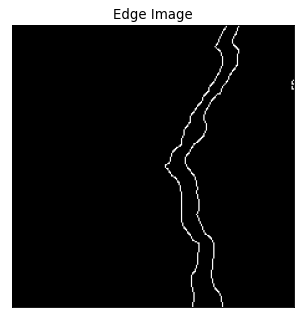

In [15]:
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
edges = cv2.Canny(output3,100,200)

plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

## Image gradient using Sobel and Scharr Derivatives


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


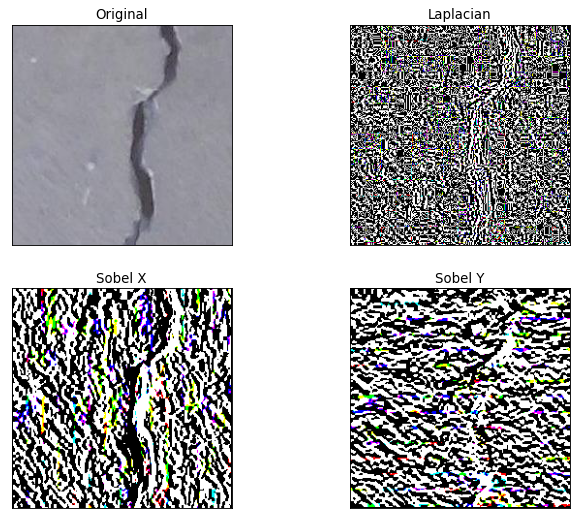

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

img11 = cv2.imread(r'C:\Users\yugan\OneDrive\Desktop\Dataset\pos\00009.jpg')

laplacian = cv2.Laplacian(img11,cv2.CV_64F)
sobelx = cv2.Sobel(img11,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img11,cv2.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img11,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

# properties of crack analysis

    

In [17]:
x,y,w,h = cv2.boundingRect(blur_grey)
aspect_ratio = float(w)/h

print ('The aspect ratio is',aspect_ratio)


The aspect ratio is 1.0


(Text(0.5, 1.0, 'Convexity Defectivity'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

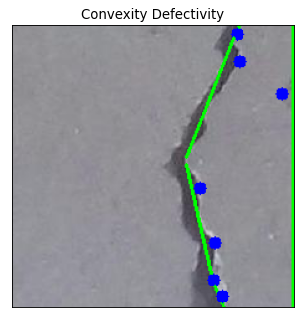

In [18]:
import cv2
import numpy as np

figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_gray, 127, 255,0)
contours,hierarchy = cv2.findContours(thresh,2,1)
cnt = contours[0]

hull = cv2.convexHull(cnt,returnPoints = False)
defects = cv2.convexityDefects(cnt,hull)

for i in range(defects.shape[0]):
    s,e,f,d = defects[i,0]
    start = tuple(cnt[s][0])
    end = tuple(cnt[e][0])
    far = tuple(cnt[f][0])
    cv2.line(img,start,end,[0,255,0],2)
    cv2.circle(img,far,5,[0,0,255],-1)

plt.subplot(122),plt.imshow(img)
plt.title('Convexity Defectivity'), plt.xticks([]), plt.yticks([])

### Moments of contours


In [19]:
contours,hierarchy = cv2.findContours(output3, 1, 2)

cnt = contours[0]
M = cv2.moments(cnt)
print (M)

{'m00': 14775.0, 'm10': 2839008.0, 'm01': 1745513.0, 'm20': 551803751.8333333, 'm11': 333751161.1666666, 'm02': 260171121.8333333, 'm30': 108415283724.0, 'm21': 64565160922.63333, 'm12': 49877910385.833336, 'm03': 43224347611.9, 'mu20': 6289949.866226673, 'mu11': -1648187.1314044595, 'mu02': 53956865.78128594, 'mu30': -30719786.286346436, 'mu21': 8667564.207031965, 'mu12': 275607027.10510254, 'mu03': -261059948.5498581, 'nu20': 0.02881324717337238, 'nu11': -0.007550079764565308, 'nu02': 0.24716771095495463, 'nu30': -0.0011577091510315122, 'nu21': 0.00032664675157893243, 'nu12': 0.010386555895734886, 'nu03': -0.009838333137698774}


In [20]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
print ('Centroid of cracks are:',cx,cy)

Centroid of cracks are: 192 118


## major and minor axis along with the orientation

In [181]:
(x,y),(MA,ma),angle = cv2.fitEllipse(cnt)
print('Angle of crack is ', angle)
print('Major axis is ',MA)
print('Minor axis is ', ma)

Angle of crack is  179.16900634765625
Major axis is  98.08343505859375
Minor axis is  224.0000762939453


In [182]:
ARI = MA/ma
print('Ari_axis ratio index is',ARI)

Ari_axis ratio index is 0.4378723288017243


In [183]:
perimeter = cv2.arcLength(cnt,True)
print('Perimeter is :',perimeter)

Perimeter is : 600.2497808933258


### Equivalent Diameter is the diameter of the circle whose area is same as the contour area.



In [184]:
area = cv2.contourArea(cnt)
equi_diameter = np.sqrt(4*area/np.pi)
print('Equal diameter is ',equi_diameter)

Equal diameter is  137.1572611036763


In [185]:

area = cv2.contourArea(cnt)
print('Area is ',area)

Area is  14775.0


##  Minimum and maximum location of crack along with minimum intensity

In [186]:
mask = np.zeros(img_grey.shape,np.uint8)
cv2.drawContours(mask,[cnt],0,255,-1)
pixelpoints = np.transpose(np.nonzero(mask))
#pixelpoints = cv2.findNonZero(mask)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(img_grey,mask = mask)

In [187]:
mean_val = cv2.mean(img_grey,mask = mask)
print ('Minimun intensity is',mean_val)

Minimun intensity is (145.68654931916308, 0.0, 0.0, 0.0)


In [188]:
print ('Minimum value of contour is ',min_val)
print ('Maximum value of contour is ',max_val)
print ('Location of Minimum value incontour is ',min_loc)
print ('Location of Maximum value incontour is  ',max_loc)

Minimum value of contour is  102.0
Maximum value of contour is  214.0
Location of Minimum value incontour is  (167, 216)
Location of Maximum value incontour is   (159, 167)


In [189]:
area = cv2.contourArea(cnt)
x,y,w,h = cv2.boundingRect(cnt)
rect_area = w*h
extent = float(area)/rect_area
print('Extent is ' ,extent)

Extent is  0.7396375650780938


###  Solidity is the ratio of contour area to its convex hull area.



In [190]:
area = cv2.contourArea(cnt)
hull = cv2.convexHull(cnt)
hull_area = cv2.contourArea(hull)
solidity = float(area)/hull_area
print ('Solidity is :', solidity)

Solidity is : 0.9387508736260245


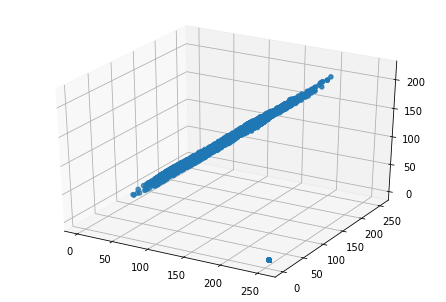

In [191]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
r, g, b = cv2.split(img)
r = r.flatten()
g = g.flatten()
b = b.flatten()#plotting 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r, g, b)
plt.show()

(Text(0.5, 1.0, 'Convexity Defectivity'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

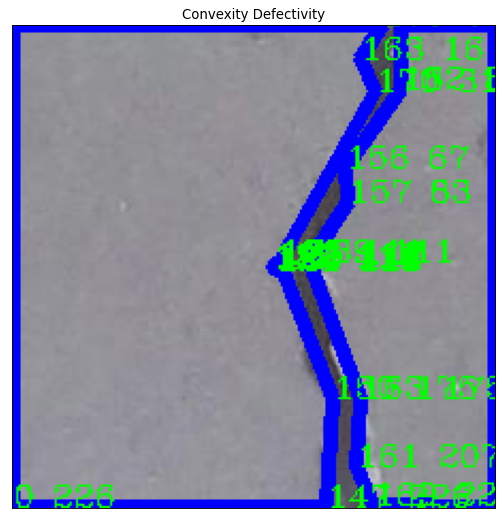

In [192]:
import numpy as np 
import cv2 
figure(num=None, figsize=(20, 8), dpi=80, facecolor='w', edgecolor='k')
  
# Reading image 
font = cv2.FONT_HERSHEY_COMPLEX 
img2 = cv2.imread((r'C:\Users\yugan\OneDrive\Desktop\Dataset\pos\00004.jpg'), cv2.IMREAD_COLOR) 
  
img = cv2.imread((r'C:\Users\yugan\OneDrive\Desktop\Dataset\pos\00004.jpg'), cv2.IMREAD_GRAYSCALE) 
  
# Converting image to a binary image 
# ( black and white only image). 
_, threshold = cv2.threshold(img, 110, 255, cv2.THRESH_BINARY) 
  
# Detecting contours in image. 
contours, _= cv2.findContours(threshold, cv2.RETR_TREE, 
                               cv2.CHAIN_APPROX_SIMPLE) 
  
# Going through every contours found in the image. 
for cnt in contours : 
  
    approx = cv2.approxPolyDP(cnt, 0.009 * cv2.arcLength(cnt, True), True) 
  
    # draws boundary of contours. 
    cv2.drawContours(img2, [approx], 0, (0, 0, 255), 5)  
  
    # Used to flatted the array containing 
    # the co-ordinates of the vertices. 
    n = approx.ravel()  
    i = 0
  
    for j in n : 
        if(i % 2 == 0): 
            x = n[i] 
            y = n[i + 1] 
  
            # String containing the co-ordinates. 
            string = str(x) + " " + str(y)  
  
            if(i == 0): 
                # text on topmost co-ordinate. 
                cv2.putText(img2, " ", (x, y), 
                                font, 0.5, (255, 0, 0))  
            else: 
                # text on remaining co-ordinates. 
                cv2.putText(img2, string, (x, y),  
                          font, 0.5, (0, 255, 0))  
        i = i + 1
  
# Showing the final image. 
plt.subplot(122),plt.imshow(img2)
plt.title('Convexity Defectivity'), plt.xticks([]), plt.yticks([]) 